# Implementing Linear Regression

## Introduction

Linear regression is a model that helps find the linear equation that best explains the correlation between variables and an outcome. In this blog post, I implement linear regression in two ways. 

The first is analytical, in which I use the formula:
$$\hat w = argmin_{w}L(w) = argmin_{w}\lVert Xw - y \rVert^2$$ This formula updates the weight according to the loss function: $$l(\hat y, y) = (\hat y - y)^2$$ With this minimization equation, one can then take the gradient with respect to $\hat w$, and solve for $\hat w$ as $$\hat w = (X^TX)^{-1}X^Ty$$

The second was with gradient descent, the formula for the gfradient being $$\nabla L = 2X^T(Xw - y)$$ Each weight update, the gradient multiplied by an alpha value (default alpha = 0.001) was subtracted from the weight to obtain the new weight. 

These two implementations of linear regression are seen below and my source code can be found at [source code](https://github.com/bridgetulian/bridgetulian.github.io/blob/main/posts/Linear-Regression-Blog-Post/linear_regression.py).

## Data Set Up

In [73]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


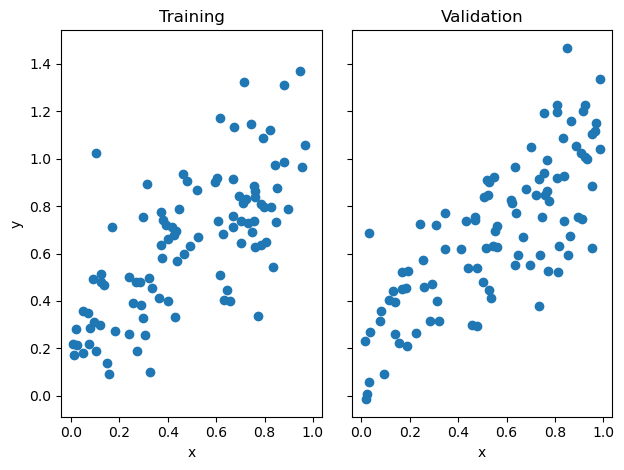

In [74]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

## Implementation One: Analytical Linear Regression

In [75]:
from linear_regression import LinearRegression

LR = LinearRegression()
LR.fit_analytic(X_train, y_train) # I used the analytical formula as my default fit method

print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")

Training score = 0.5013
Validation score = 0.6025


In [76]:
LR.w 

array([0.75348988, 0.27263304])

## Implementation Two: Gradient Descent Linear Regression

Observe the weight is the same as the analytical linear regression weight. 

In [77]:
LR2 = LinearRegression()
LR2.fit_gradient(X_train, y_train) # I used the analytical formula as my default fit method

LR2.w

array([0.75348774, 0.27263413])

## Score History for Gradient Descent

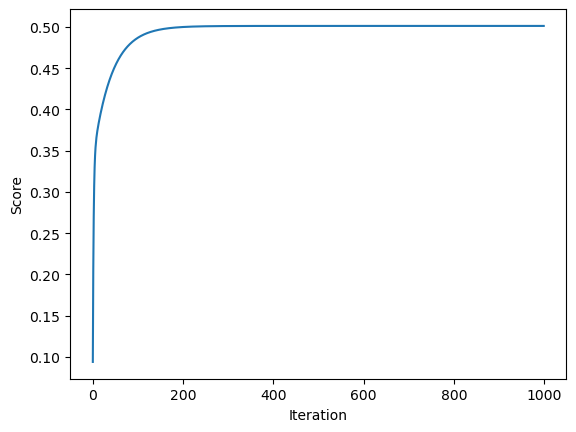

In [78]:
plt.plot(LR2.score_history)
labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")

## Experimentation: Increasing Number of Features

Below I ran an experiment; what would happen if I increased the number of features to right below the number of training data points? What occurred, shown very clearly in the graph, is overfitting. As I explain below, the validation score fell far below 0.0 with a significant increase in number of features. 

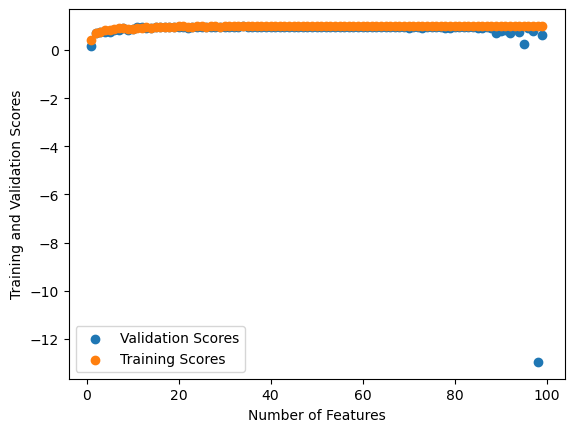

In [79]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data

training_scores = []
val_scores = []
p_features_array = []

while p_features <= (n_train - 1):
    p_features_array.append(p_features)
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
    LR = LinearRegression()
    LR.fit_analytic(X_train, y_train)
    training_scores.append(LR.score(X_train, y_train))
    val_scores.append(LR.score(X_val, y_val))
    p_features += 1
  
    
fig = plt.scatter(p_features_array, val_scores)
fig = plt.scatter(p_features_array, training_scores)
xlab = plt.xlabel("Number of Features")
ylab = plt.ylabel("Training and Validation Scores")
plt.legend(['Validation Scores', 'Training Scores'])

# # plot it
# fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
# axarr[0].scatter(X_train, y_train)
# axarr[1].scatter(X_val, y_val)
# labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
# labs = axarr[1].set(title = "Validation", xlabel = "x")
# plt.tight_layout()

The above observation of training and validation data demonstrates that increasing the number of features does not always help when it comes to validation data -- the validation scores clearly fall off significantly as features expand, although not until the number of features near the value of n_train. This is a clear example of overfitting, when the training scores remain high (nearly 1.0), but the validation scores decrease below 0.0 (exemplary of a very bad model) when the number of features is almost equivalent to the number of data points. Full understanding of the training data does not translate to validation data, but rather handles only the specifics of the training data. 

## Lasso Regularization and Validation Scores: How Lasso Helps Protect from Overfitting

In [80]:
from sklearn.linear_model import Lasso
L = Lasso(alpha = 0.001)

In [81]:
p_features = n_train - 1
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L.fit(X_train, y_train)

Lasso(alpha=0.001)

In [82]:
L.score(X_val, y_val)

0.6076240794781351

## Lasso Validation Scores

As seen below, I demonstrate three graphs which show the validation and training scores for LASSO regularized linear regression models with three different alpha values. In all three, the validation scores decrease, but not nearly with the same drastic change as with regular linear regression. 

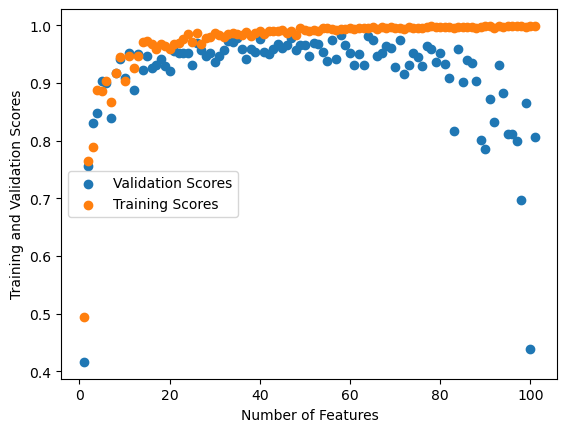

In [83]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data

training_scores2 = []
val_scores2 = []
p_features_array2 = []

while p_features <= (n_train + 1):
    p_features_array2.append(p_features)
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
    L2 = Lasso(alpha = 0.001)
    L2.fit(X_train, y_train)
    training_scores2.append(L2.score(X_train, y_train))
    val_scores2.append(L2.score(X_val, y_val))
    p_features += 1
  
    
fig = plt.scatter(p_features_array2, val_scores2)
fig = plt.scatter(p_features_array2, training_scores2)
xlab = plt.xlabel("Number of Features")
ylab = plt.ylabel("Training and Validation Scores")
plt.legend(['Validation Scores', 'Training Scores'])

With LASSO regulation, when the number of features gets large the validation scores still drop. However, they remain higher than with normal linear regression. They still fall off significantly when number of feature increase, but they do not fall as far as the linear regression models did (i.e. on this specific data, LASSO falls to a little under 0.5 validation score whereas linear regression falls under 0.0 validation score). This demonstrates how LASSO regularization helps overparametized models -- it helps protect the model (at least slightly) from overfitting.

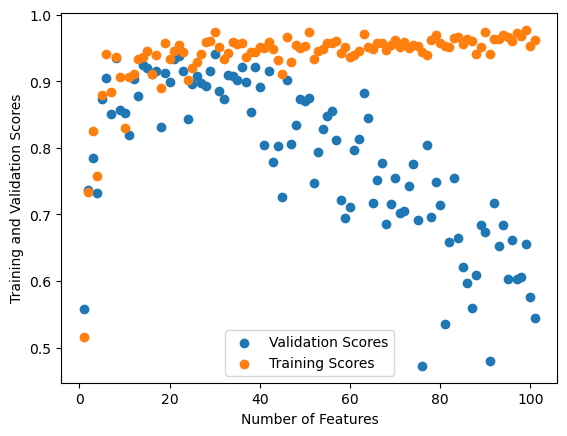

In [84]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data

training_scores2 = []
val_scores2 = []
p_features_array2 = []

while p_features <= (n_train + 1):
    p_features_array2.append(p_features)
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
    L2 = Lasso(alpha = 0.01)
    L2.fit(X_train, y_train)
    training_scores2.append(L2.score(X_train, y_train))
    val_scores2.append(L2.score(X_val, y_val))
    p_features += 1
  
    
fig = plt.scatter(p_features_array2, val_scores2)
fig = plt.scatter(p_features_array2, training_scores2)
xlab = plt.xlabel("Number of Features")
ylab = plt.ylabel("Training and Validation Scores")
plt.legend(['Validation Scores', 'Training Scores'])

Changing the alpha (i.e. making the alpha value 0.01 instead of 0.001) changes the validation scores even more significantly. The validation scores fall off much earlier -- around p_features = 50 they start decreasing -- but they still do not fall as low as the linear regression validation scores (they reach the same score as with alpha = 0.001). 

/Users/bridgetulian/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.657e-02, tolerance: 4.368e-02
  model = cd_fast.enet_coordinate_descent(
/Users/bridgetulian/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.456e-02, tolerance: 3.745e-02
  model = cd_fast.enet_coordinate_descent(
/Users/bridgetulian/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

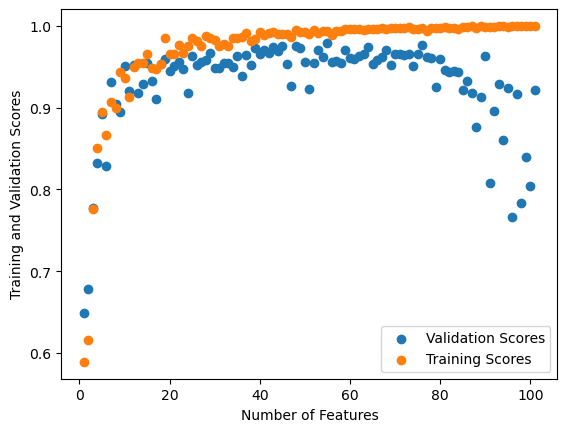

In [85]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data

training_scores2 = []
val_scores2 = []
p_features_array2 = []

while p_features <= (n_train + 1):
    p_features_array2.append(p_features)
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
    L2 = Lasso(alpha = 0.0001)
    L2.fit(X_train, y_train)
    training_scores2.append(L2.score(X_train, y_train))
    val_scores2.append(L2.score(X_val, y_val))
    p_features += 1
  
    
fig = plt.scatter(p_features_array2, val_scores2)
fig = plt.scatter(p_features_array2, training_scores2)
xlab = plt.xlabel("Number of Features")
ylab = plt.ylabel("Training and Validation Scores")
plt.legend(['Validation Scores', 'Training Scores'])

On the other hand, decreasing the alpha from 0.001 to 0.0001 makes the validation scores decrease much slower and to a much lesser extent. In the above graph, the validation scores with Lasso regularization only fall to around 0.75. Decreasing the alpha, therefore, increases the validation scores.